# Latar Belakang
Amazon Web Services (AWS) adalah platform layanan komputasi awan yang disediakan oleh Amazon, memperkenalkan model “pay-as-you-go” untuk sumber daya TI seperti server virtual (EC2), penyimpanan objek (S3), database terkelola, dan layanan jaringan. Diluncurkan pada 2006, AWS awalnya dikembangkan untuk memenuhi kebutuhan infrastruktur internal Amazon dan kemudian dibuka untuk publik, memungkinkan perusahaan dari berbagai skala untuk mengakses kapasitas komputasi dan penyimpanan tanpa harus investasi di pusat data fisik. Dengan arsitektur global yang terbagi dalam beberapa region dan Availability Zone, AWS menawarkan skalabilitas otomatis, ketersediaan tinggi, serta berbagai alat keamanan dan kepatuhan yang memudahkan pengguna menjalankan beban kerja mulai dari aplikasi web sederhana hingga big data dan machine learning.

Software as a Service (SaaS) adalah model penyediaan aplikasi perangkat lunak melalui internet, di mana penyedia layanan mengelola seluruh infrastruktur, platform, dan aplikasi. Pengguna cukup berlangganan atau membayar sesuai pemakaian untuk mengakses aplikasi tersebut melalui peramban web, tanpa perlu memasang atau memelihara perangkat lunak secara lokal. Keunggulan SaaS meliputi implementasi cepat, update otomatis, dan biaya awal yang lebih rendah, namun pengguna bergantung pada kualitas koneksi internet dan memiliki kontrol terbatas atas lingkungan hosting serta konfigurasi di balik aplikasi. Contoh populer SaaS antara lain Google Workspace, Salesforce CRM, dan Microsoft 365.   


## Pernyataan Masalah
Perusahaan ingin mengetahui **pola dan tren penjualan SaaS** di berbagai region, segmen pelanggan, dan produk, serta memahami **pengaruh kebijakan diskon terhadap profitabilitas**. Informasi ini akan membantu dalam:
- Mengidentifikasi region dan segmen pelanggan dengan kontribusi penjualan dan profit tertinggi  
- Mengoptimalkan strategi penjualan (misal diskon) untuk memaksimalkan margin profit  
- Menentukan fokus pengembangan dan promosi produk   

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik tren penjualan dan profit produk SaaS di berbagai region, segmen pelanggan, dan produk, serta sejauh mana variasi diskon mempengaruhi profit margin?**

## Pertanyaan Analitis
- Apakah terdapat pola musiman dalam volume penjualan dan profit SaaS?  
- Region mana yang memberikan kontribusi penjualan dan profit tertinggi?  
- Bagaimana perbandingan rata-rata nilai pesanan (Average Order Value) dan margin profit antar segmen (SMB, Strategic, Enterprise)?  
- Produk SaaS mana yang paling laris dan paling menguntungkan?  
- Sejauh mana variasi diskon mempengaruhi profit margin pada setiap transaksi?  


# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

In [133]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
pd.set_option('display.max_rows',     None)  
pd.set_option('display.max_columns',  None)  
pd.set_option('display.width',       200)     
pd.set_option('display.max_colwidth', None)
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi data transaksi penjualan perusahaan SaaS fiktif yang menjual perangkat lunak penjualan dan pemasaran (B2B). Ada 19 kolom di dalam dataset AWS SaaS Sales, yaitu:

* **Row ID**: ID unik untuk tiap baris transaksi.  
* **Order ID**: ID unik untuk tiap order.  
* **Order Date**: Tanggal order dilakukan.  
* **Date Key**: Representasi numerik tanggal order (YYYYMMDD).  
* **Contact Name**: Nama orang yang melakukan order.  
* **Country**: Negara tempat order dilakukan.  
* **City**: Kota tempat order dilakukan.  
* **Region**: Region tempat order dilakukan.  
* **Subregion**: Subregion tempat order dilakukan.  
* **Customer**: Nama perusahaan yang melakukan order.  
* **Customer ID**: ID unik untuk tiap customer.  
* **Industry**: Industri tempat customer beroperasi.  
* **Segment**: Segmen customer (SMB, Strategic, Enterprise, dll.).  
* **Product**: Produk yang dipesan.  
* **License**: Kode lisensi untuk produk.  
* **Sales**: Jumlah total penjualan untuk transaksi (dalam mata uang).  
* **Quantity**: Jumlah unit produk yang dipesan.  
* **Discount**: Diskon yang diberikan pada transaksi.  
* **Profit**: Keuntungan dari transaksi.  

Berikut 5 baris teratas dan terbawah dari dataset AWS SaaS Sales.


In [134]:
df=pd.read_csv('Saas-Sales.csv')
display(df.head(),df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


## Data Understanding & Cleaning (AWS SaaS Sales)

Sebelum analisis lebih lanjut, kita akan melakukan *data understanding* dan *data cleaning* pada dataset AWS SaaS Sales. Setiap langkah akan disertai justifikasi—baik dari sisi *domain knowledge* maupun statistik.

1. **Memeriksa Struktur & Tipe Data**  
   - **Kolom tanggal** (`Order Date`, `Date Key`):  
     - Ubah `Order Date` menjadi tipe `datetime` (format YYYY-MM-DD).  
     - Ubah `Date Key` menjadi `int` atau `datetime` jika berguna untuk filter.  
     - *Justifikasi:* Analisis tren memerlukan tipe waktu yang benar untuk agregasi berdasarkan hari/bulan/kuartal.  
   - **Kolom numerik** (`Sales`, `Quantity`, `Discount`, `Profit`):  
     - Pastikan bertipe `float` atau `int`.  
     - *Justifikasi:* Perhitungan agregat (sum, mean, margin) akan akurat.  
   - **Kolom kategorikal** (`Country`, `Region`, `Industry`, `Segment`, `Product`):  
     - Ubah ke tipe `category` (jika di Python/pandas) untuk optimasi memori dan analisis.  
     - *Justifikasi:* Mempermudah grouping dan mengurangi kesalahan penamaan.

2. **Memeriksa Nilai Hilang (Missing Values)**  
   - Hitung persentase missing di setiap kolom.  
   - **Jika `Discount` missing:** isi dengan `0.0` (asumsi tidak ada diskon).  
   - **Jika `Sales` atau `Profit` missing:**  
     - Jika sangat sedikit (< 1% dari total), hapus baris.  
     - Jika lebih banyak, pertimbangkan imputasi median berdasarkan `Product` atau `Segment`.  
   - *Justifikasi:* Kolom keuangan utama harus lengkap untuk menjaga integritas analisis profitabilitas.

3. **Memeriksa Duplikasi**  
   - Pastikan **`Row ID`** unik untuk setiap baris.  
   - Periksa kombinasi **`Order ID` + `Product`** agar tidak ada baris ganda akibat kesalahan import.  
   - Jika menemukan duplikat:  
     - Validasi apakah ini memang transaksi terpisah (licensing berbeda) atau kesalahan.  
     - Hapus duplikat yang terbukti salah input.  
   - *Justifikasi:* Duplikat menimbulkan bias pada total sales/profit.

4. **Memeriksa Outlier & Anomali**  
   - **Profit Negatif**: identifikasi baris dengan `Profit < 0`.  
     - Cek apakah disebabkan diskon terlalu tinggi atau biaya lisensi.  
     - Tandai untuk analisis lebih lanjut atau exclusion jika bukan case valid.  
   - **Discount di luar rentang [0,1]**:  
     - Perbaiki jika ada format persen mis-entry (misal `25` bukannya `0.25`).  
   - **Sales atau Quantity yang ekstrem**:  
     - Gunakan IQR (1.5×IQR rule) atau z-score (>|3|) untuk deteksi outlier.  
     - Verifikasi manual, karena transaksi besar dapat valid (enterprise deal).  
   - *Justifikasi:* Memastikan outlier bukan error data sebelum analisis tren dan segmentasi.

Dengan langkah-langkah ini, dataset AWS SaaS Sales akan menjadi bersih, konsisten, dan siap untuk eksplorasi statistik dan visualisasi lanjutan.


In [135]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      99

In [136]:
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


In [137]:
# data unik di tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020, 12/10/2022, 7/17/2023, 9/25/2021, 1/16/2022, 9/17/2021, 10/20/2023, 12/9/2022, 12/27/2021, 9/11/2023, 7/18/2022, 9/20/2023, 3/12/2022, 10/20/2020, 6/21/2022, 4/18/2021, 12/12/2022, 6/18/2022, 11/24/2021, 4/30/2021, 12/5/2020, 6/5/2022, 9/19/2022, 9/15/2023, 4/26/2021, 12/10/2023, 11/26/2020, 10/12/2020, 9/3/2021, 11/14/2023, 5/29/2023, 10/27/2023, 4/6/2022, 9/18/2022, 1/31/2021, 11/7/2023, 11/10/2023, 6/18/2023, 9/7/2022, 8/30/2022, 12/2/2022, 11/13/2021, 11/24/2023, 10/15/2021, 12/26/2023, 11/4/2022, 8/25/2020, 3/2/2021, 4/5/2021, 12/26/2020, 9/20/2020, 11/6/2023, 11/7/2022, 2/3/2023, 10/14/2022, 9/6/2022, 9/19/2023, 12/23/2023, 9/7/2021, 10/22/2020, 3/14/2022, 5/31/2021, 5/28/2021, 3/1/2020, 11/21/2022, 5/12/2022, 12/28/2021, 11/17/2022, 11/8/2022, 9/8/2020, 8/5/2020, 9/14/2020, 4/22/2023, 11/21/2021, 12/15/2021, 11/19/2020, 11/29/2022, 8/26/2020, 7/17/2022, 10/12/2021, 10/31/2021, 3/21/2020, 7/7/2023, 6/25/2023, 8/3/2020, 12/18/2023, 6/4/2023, 12/2/2023, 2/9/2021, 1/2/2021, 10/29/2022, ...]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 202

In [138]:
#Cek Data Duplikat
num_dup_all = df.duplicated().sum()
print(f"Jumlah baris duplikat (semua kolom): {num_dup_all}")

Jumlah baris duplikat (semua kolom): 0


## Ringkasan Dataset

### Ukuran & Struktur
- **Baris & Kolom**: Dataset AWS SaaS Sales memiliki **9.994 baris** dan **19 kolom**.
- **Missing Values**: Tidak ditemukan nilai kosong (semua kolom terisi penuh).

### Tipe Data
- **Numerik**:  
  - `Row ID` (int64)  
  - `Date Key` (int64)  
  - `Sales` (float64)  
  - `Quantity` (int64)  
  - `Discount` (float64)  
  - `Profit` (float64)  
- **Kategorikal / Object**:  
  - `Order ID` (object)  
  - `Order Date` (object/string)  
  - `Contact Name` (object)  
  - `Country`, `City`, `Region`, `Subregion` (object)  
  - `Customer` (object)  
  - `Customer ID` (int64)  
  - `Industry`, `Segment`, `Product`, `License` (object)  
> **Catatan:** `Order Date` masih bertipe string—idealnya dikonversi ke `datetime`.

### Kardinalitas (Unique Counts)
| Kolom          | Unique Values |  
| -------------- | ------------- |  
| `Row ID`       | 9.994         |  
| `Order ID`     | 5.009         |  
| `Contact Name` | 793           |  
| `Country`      | 48            |  
| `City`         | 262           |  
| `Region`       | 3 (EMEA, AMER, APJ) |  
| `Subregion`    | 12            |  
| `Customer`     | 99            |  
| `Customer ID`  | 99            |  
| `Industry`     | 10            |  
| `Segment`      | 3 (SMB, Strategic, Enterprise) |  
| `Product`      | 14            |  
| `License`      | 9.994         |  
| `Quantity`     | 14 (1–14)     |  
| `Discount`     | 12 (0.0–0.8)  |  

### Ringkasan Statistik Numerik
- **Sales**:  
  - Min = 0.444  
  - Max = 22 638.48  
- **Profit**:  
  - Min = −6 599.98  
  - Max = 8 399.98  
- **Quantity**: 1 – 14  
- **Discount**: 0.0 – 0.8  

*(Catatan: sebelumnya disebut min profit ≈ −383, padahal nilai terendah adalah −6 599.98.)*

### Rentang Tanggal Transaksi
- **Order Date** terendah: 04 Januari 2020  
- **Order Date** tertinggi: 31 Desember 2023  

---

## Analisis Tambahan
- **Kolom Salah Format**  
  - `Order Date` masih object/string (perlu konversi ke `datetime`).  
- **Kolom Salah Ketik**  
  - Tidak ada typo pada nama kolom.  
- **Kolom Kurang Relevan**  
  - `Row ID` (hanya indeks baris)  
  - `License` (unik per baris, tidak berguna untuk agregasi)  
  - `Date Key` (duplikasi informasi tanggal jika `Order Date` dikonversi)  
- **Data Kosong / Duplikat**  
  - Tidak ada missing values atau data duplikat; kolom diisi lengkap (0 NaN).  


### Missing Value

In [139]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Row ID          0.0
Order ID        0.0
Order Date      0.0
Date Key        0.0
Contact Name    0.0
Country         0.0
City            0.0
Region          0.0
Subregion       0.0
Customer        0.0
Customer ID     0.0
Industry        0.0
Segment         0.0
Product         0.0
License         0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

Sebelum melanjutkan analisis, kita perlu melakukan dua hal pada dataset AWS SaaS Sales:

1. **Konversi `Order Date` ke Tipe `datetime`**  
   - Saat ini `Order Date` masih tersimpan sebagai string (object), misalnya `"11/9/2022"`.  
   - Dengan mengonversi ke tipe `datetime`, kita bisa:  
     - Mengelompokkan transaksi per hari/bulan/kuartal/tahun secara otomatis.  
     - Menghitung selisih waktu antar-transaksi (lead time, retensi, seasonality).  
     - Menggunakan fungsi time-series (resampling, rolling window) dengan benar.  

2. **Drop Kolom yang Kurang Relevan**  
   - **`Date Key`**: Duplikasi informasi tanggal setelah `Order Date` dikonversi.  
   - **`Row ID`**: Hanya penanda indeks baris, tidak memengaruhi sales/profit/quantity.  
   - **`License`**: Unik untuk setiap baris transaksi, tidak berguna untuk agregasi atau analisis kelompok.  

Ketiga kolom ini tidak berkaitan langsung dengan metrik utama (`Sales`, `Profit`, `Quantity`, `Discount`) sehingga dapat dihapus untuk menyederhanakan struktur data.  

In [140]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

cols_to_drop = ['Date Key', 'Row ID', 'License']
df = df.drop(columns=cols_to_drop)

print(df.dtypes)
print(df.columns.tolist())

Order ID                object
Order Date      datetime64[ns]
Contact Name            object
Country                 object
City                    object
Region                  object
Subregion               object
Customer                object
Customer ID              int64
Industry                object
Segment                 object
Product                 object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
dtype: object
['Order ID', 'Order Date', 'Contact Name', 'Country', 'City', 'Region', 'Subregion', 'Customer', 'Customer ID', 'Industry', 'Segment', 'Product', 'Sales', 'Quantity', 'Discount', 'Profit']


Setelah melihat gambaran data secara umum dan membersihkannya, sekarang mari mengecek jika ada outlier tertentu, khususnya dari data - data numerik seperti Sales, Profit, Quantity, Discount.

In [141]:
numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']
print("=== Metode IQR ===")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    n_outliers = mask.sum()
    print(f"{col}: {n_outliers} outlier ( < {lower_bound:.2f} atau > {upper_bound:.2f} )")

print("\n=== Metode Z-score ===")
z_scores = df[numeric_cols].apply(lambda x: stats.zscore(x, nan_policy='omit'))
outlier_mask = (np.abs(z_scores) > 3).any(axis=1)
print(f"Total baris dengan outlier (|z| > 3) di salah satu kolom numerik: {outlier_mask.sum()}")

print("\nContoh baris outlier (IQR) untuk kolom 'Profit':")
Q1, Q3 = df['Profit'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lb, ub = Q1 - 1.5*IQR, Q3 + 1.5*IQR
print(df[(df['Profit'] < lb) | (df['Profit'] > ub)].head())


=== Metode IQR ===
Sales: 1167 outlier ( < -271.71 atau > 498.93 )
Profit: 1881 outlier ( < -39.72 atau > 70.82 )
Quantity: 170 outlier ( < -2.50 atau > 9.50 )
Discount: 856 outlier ( < -0.30 atau > 0.50 )

=== Metode Z-score ===
Total baris dengan outlier (|z| > 3) di salah satu kolom numerik: 558

Contoh baris outlier (IQR) untuk kolom 'Profit':
            Order ID Order Date    Contact Name        Country           City Region Subregion           Customer  Customer ID Industry Segment         Product      Sales  Quantity  Discount  \
1   EMEA-2022-152156 2022-11-09     Nathan Bell        Ireland         Dublin   EMEA      UKIR            Chevron         1017   Energy     SMB      FinanceHub   731.9400         3      0.00   
3   EMEA-2021-108966 2021-10-11      Zoe Hodges        Germany      Stuttgart   EMEA   EU-WEST  Royal Dutch Shell         1031   Energy     SMB  ContactMatcher   957.5775         5      0.45   
7   AMER-2020-115812 2020-06-09   Thomas Hodges  United States  New 

## Ringkasan Deteksi Outlier

### Tabel Outlier (Metode IQR)
| Column   | Lower Bound | Upper Bound | Outlier Count | Outlier % |
| -------- | ----------- | ----------- | ------------- | --------- |
| **Sales**    | –271.71     | 498.93      | 1.167          | 11,67 %   |
| **Profit**   | –39.72      | 70.82       | 1.881          | 18,83 %   |
| **Quantity** | –2.50       | 9.50        | 170            | 1,70 %    |
| **Discount** | –0.30       | 0.50        | 856            | 8,57 %    |

### Interpretasi
- **Sales**  
  1.167 transaksi (11,67 %) memiliki nilai penjualan di atas batas normal (> 498,93), menandakan banyak “enterprise deals” besar.

- **Profit**  
  1.881 transaksi (18,83 %) berada di luar rentang –39,72 hingga 70,82:  
  - Profit sangat tinggi (> 70,82)—deal besar  
  - Profit sangat negatif (< –39,72)—kerugian ekstrem, kemungkinan diskon terlalu besar

- **Quantity**  
  170 transaksi (1,70 %) dengan kuantitas > 9,5 unit, menunjukkan pembelian volume tinggi.

- **Discount**  
  856 transaksi (8,57 %) dengan diskon > 50 %, relatif jarang dan mungkin promosi khusus.

### Implikasi & Penanganan
- Banyak outlier mencerminkan **fenomena bisnis valid** (deal besar, diskon promo), bukan sekadar kesalahan data.  
- **Analisis Terpisah**: Buat subset “Enterprise Deals” (Sales tinggi) dan “Loss Cases” (Profit negatif) untuk studi mendalam.

Dengan demikian saya tidak akan mengubah atau menghapus outlier yang ada agar saya bisa menjawab dengan lebih jelas mengapa hal - hal ini bisa terjadi.


### Sekarang mari cek data anomaly dalam Sales, Quantity, Discount, dan Profit

In [142]:
checks = {
    'Sales < 0':             df['Sales'] < 0,
    'Quantity < 0':          df['Quantity'] < 0,
    'Discount < 0':          df['Discount'] < 0,
    'Discount > 1':          df['Discount'] > 1,
    'Profit is null':        df['Profit'].isna(),
    'Sales is null':         df['Sales'].isna(),
    'Quantity is null':      df['Quantity'].isna(),
    'Discount is null':      df['Discount'].isna(),
}

for desc, cond in checks.items():
    subset = df[cond]
    count = len(subset)
    print(f"{desc}: {count} baris")
    if count > 0:
        print(subset.head(), "\n")

Sales < 0: 0 baris
Quantity < 0: 0 baris
Discount < 0: 0 baris
Discount > 1: 0 baris
Profit is null: 0 baris
Sales is null: 0 baris
Quantity is null: 0 baris
Discount is null: 0 baris


## Hasil Pengecekan Anomali Data Numerik

| Pemeriksaan            | Jumlah Baris |
| ---------------------- | ------------ |
| **Sales < 0**          | 0            |
| **Quantity < 0**       | 0            |
| **Discount < 0**       | 0            |
| **Discount > 1**       | 0            |
| **Profit is null**     | 0            |
| **Sales is null**      | 0            |
| **Quantity is null**   | 0            |
| **Discount is null**   | 0            |

### Interpretasi
- **Tidak ada nilai negatif** pada kolom **Sales** dan **Quantity** — semua transaksi tercatat dengan angka ≥ 0.  
- **Discount** sepenuhnya berada dalam rentang [0, 1] — tidak ada diskon negatif atau lebih dari 100 %.  
- **Tidak ada nilai kosong (NaN)** di kolom **Sales**, **Profit**, **Quantity**, maupun **Discount**.

> **Kesimpulan:** Semua metrik numerik berada dalam rentang yang valid dan lengkap. Tidak ditemukan anomali seperti nilai negatif atau data hilang pada kolom-kolom tersebut. Data siap untuk analisis lebih lanjut tanpa perlu penanganan anomali atau imputasi.


In [143]:
missing_geo = df[df[['Country','Region','Subregion','City']].isnull().any(axis=1)]
print(f"Rows with any missing Country/Region/Subregion/City: {len(missing_geo)}")
print(missing_geo[['Country','Region','Subregion','City']].drop_duplicates())

country_regions = df.groupby('Country')['Region'].unique().reset_index()
print("\nRegions per Country:")
print(country_regions)

region_subregions = df.groupby('Region')['Subregion'].unique().reset_index()
print("\nSubregions per Region:")
print(region_subregions)

subregion_cities = df.groupby('Subregion')['City'].unique().reset_index()
print("\nCities per Subregion:")
print(subregion_cities)

region_countries = df.groupby('Region')['Country'].unique().apply(list)
multi_country = region_countries[region_countries.apply(lambda x: len(x)>1)]
print("\nRegions mapped to multiple Countries:")
print(multi_country)

geo_counts = df.groupby(['Country','Region','Subregion','City']).size().reset_index(name='order_count')
anomalies = geo_counts[geo_counts['order_count'] < 5]
print(f"\nGeo combos with <5 orders ({len(anomalies)} rows):")
print(anomalies)

Rows with any missing Country/Region/Subregion/City: 0
Empty DataFrame
Columns: [Country, Region, Subregion, City]
Index: []

Regions per Country:
                 Country  Region
0              Argentina  [AMER]
1              Australia   [APJ]
2                Austria  [EMEA]
3                Belgium  [EMEA]
4                 Brazil  [AMER]
5                 Canada  [AMER]
6                  Chile  [AMER]
7                  China   [APJ]
8               Colombia  [AMER]
9             Costa Rica  [AMER]
10               Croatia  [EMEA]
11        Czech Republic  [EMEA]
12               Denmark  [EMEA]
13                 Egypt  [EMEA]
14               Finland  [EMEA]
15                France  [EMEA]
16               Germany  [EMEA]
17                Greece  [EMEA]
18               Iceland  [EMEA]
19                 India   [APJ]
20             Indonesia   [APJ]
21               Ireland  [EMEA]
22                Israel  [EMEA]
23                 Italy  [EMEA]
24                 Japan   [

## 1. Kelengkapan Data
- **Tidak ada** baris dengan nilai `Country`, `Region`, `Subregion`, atau `City` yang kosong.

## 2. Konsistensi Country → Region
- Setiap negara **hanya** muncul di satu `Region` (AMER, EMEA, atau APJ).  
- **Tidak ada** kasus di mana satu negara terdaftar di lebih dari satu Region.

## 3. Distribusi Region
- **AMER**: negara-negara di benua Amerika (mis. United States, Brazil, Argentina, dll.)  
- **EMEA**: negara-negara di Eropa, Timur Tengah & Afrika (mis. Germany, France, Egypt, dll.)  
- **APJ**: negara-negara di Asia-Pasifik & Jepang (mis. China, Australia, India, dll.)

Dapat disimpulkan tidak ada data anomaly dari data geografi


In [144]:
missing = df[df[['Industry','Product','Segment']].isnull().any(axis=1)]
print(f"Rows with missing Industry/Product/Segment: {len(missing)}")
print(missing[['Industry','Product','Segment']].drop_duplicates())

for col in ['Industry','Product','Segment']:
    print(f"\n=== Value counts: {col} ===")
    print(df[col].value_counts(dropna=False))

threshold = 5
for col in ['Industry','Product','Segment']:
    freqs = df[col].value_counts()
    rare = freqs[freqs < threshold]
    print(f"\nRare categories in {col} (<{threshold} orders):")
    print(rare)

pi = df.groupby('Product')['Industry'].nunique()
ambiguous_pi = pi[pi > 1]
print("\nProducts mapped ke >1 Industry (potensi typo/mislabel):")
print(ambiguous_pi)

ps = df.groupby('Product')['Segment'].nunique()
ambiguous_ps = ps[ps > 1]
print("\nProducts mapped ke >1 Segment:")
print(ambiguous_ps)

print("\n=== Segments per Industry ===")
print(df.groupby('Industry')['Segment'].unique().explode().sort_values().to_frame('Segment'))

Rows with missing Industry/Product/Segment: 0
Empty DataFrame
Columns: [Industry, Product, Segment]
Index: []

=== Value counts: Industry ===
Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64

=== Value counts: Product ===
Product
ContactMatcher                1842
Support                       1560
FinanceHub                     981
SaaS Connector Pack            957
Site Analytics                 889
Marketing Suite - Gold         846
ChatBot Plugin                 796
Data Smasher                   775
OneView                        466
SaaS Connector Pack - Gold     254
Marketing Suite                228
Storage                        217
Big Ol Database                115
Alchemy                         68
Name: count, dtype: int64

=== Val

## 1. Kelengkapan Data  
- **Rows with missing Industry/Product/Segment: 0**  
  Artinya **tidak ada** baris yang memiliki nilai kosong pada kolom Industry, Product, atau Segment—data kategori Anda lengkap.

## 2. Distribusi Industry  
- **Finance: 2.127 baris** (terbanyak)  
- Energy: 1.316  
- Tech: 1.236  
- Manufacturing: 1.222  
- Healthcare: 1.049  
- Consumer Products: 1.021  
- Retail: 972  
- Communications: 593  
- Transportation: 351  
- **Misc: 107 baris** (paling sedikit)  
  Ini menunjukkan seberapa besar kontribusi masing-masing industri terhadap total order. Finance mendominasi, sedangkan kategori Misc relatif jarang.

## 3. Distribusi Product  
- **ContactMatcher: 1.842 baris** (terpopuler)  
- Support: 1.560  
- FinanceHub: 981  
- SaaS Connector Pack: 957  
- …  
  Kita bisa melihat produk mana yang paling banyak terjual (merupakan prioritas peninjauan performa) dan mana yang kurang populer.

## 4. Makna Umum  
- **Tidak ada missing data** → dataset aman dari blank entry di kategori.  
- **Value counts** membantu:  
  - **Identifikasi top/bottom categories** (mis. Finance & Misc; ContactMatcher & produk terendah)  
  - **Menentukan fokus analisis lanjutan** pada kategori besar atau kecil.  



### Penambahan Kolom Profit Margin pada Tahap Data Preparation

Menambahkan kolom **Profit Margin** (`Profit` / `Sales`) sangat penting dalam analisis bisnis, karena:
- Mengukur **efisiensi keuntungan** dari setiap transaksi, bukan hanya melihat angka profit atau sales secara absolut.
- Memungkinkan analisis lebih dalam, misalnya:
  - Membandingkan profitabilitas antar segmen, produk, region, atau periode waktu.
  - Mengidentifikasi pola yang tidak tampak dari total profit saja (misalnya, produk dengan sales tinggi tapi margin rendah).
  - Analisis dampak diskon dan strategi promosi terhadap profitabilitas.
- Kolom ini akan sering digunakan di banyak analisis berikutnya, jadi lebih efisien jika sudah tersedia sejak awal pengolahan data.

**Dengan menambahkannya di awal, proses analisis akan jadi lebih konsisten, efisien, dan insightful.**



In [145]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df.loc[df['Sales'] == 0, 'Profit Margin'] = None

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [146]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(9994, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,Order ID,object,0,5009,"[AMER-2023-143455, APJ-2021-117800]"
1,Order Date,datetime64[ns],0,1237,"[2020-08-06T00:00:00.000000000, 2023-03-22T00:00:00.000000000]"
2,Contact Name,object,0,793,"[Pippa Morrison, Tracey Skinner]"
3,Country,object,0,48,"[Greece, Germany]"
4,City,object,0,262,"[Columbus, Anaheim]"
5,Region,object,0,3,"[EMEA, APJ]"
6,Subregion,object,0,12,"[LATAM, ANZ]"
7,Customer,object,0,99,"[Exxon Mobil, Samsung Electronics]"
8,Customer ID,int64,0,99,"[1086, 1057]"
9,Industry,object,0,10,"[Healthcare, Communications]"


Sebenarnya tidak terlalu ada banyak perubahan sebelum dan sesudah data dibersihkan. Akan tetapi, kita telah mengubah format dengan benar, telah memastikan bahwa tidak ada data yang duplikat, kosong, maupun anomali yang tidak masuk akal, dan menambahkan kolom Profit Margin untuk memudahkan analisa. Sehingga data - data ini sudah siap untuk di analisa

In [147]:
df.to_excel('Clean-Saas-Sales.xlsx', index=False)

## Transisi dari Data Cleaning ke Data Analysis

Setelah data dibersihkan dan diperiksa kualitasnya, kita masuk ke tahap **Data Analysis** dengan kerangka berikut:

1. **Metode Statistik**  
   - Gunakan **statistik deskriptif** (mean, median, distribusi, tabel frekuensi) untuk memahami pola dasar.  
   - Terapkan **statistik inferensial** (uji t‑test, ANOVA, regresi sederhana) saat ingin menguji signifikansi perbedaan atau hubungan (mis. diskon vs margin).  

2. **Alur Analisis Temuan**  
   1. **Pola Musiman**  
      - Visualisasi time series penjualan & profit per bulan/kuartal.  
      - Seasonal decomposition atau uji tren jika diperlukan.  
   2. **Kontribusi Regional**  
      - Bar chart & tabel ranking sales/profit per Region (EMEA, AMER, APJ) dan Subregion.  
   3. **Perbandingan Segmen**  
      - Hitung dan bandingkan **Average Order Value (AOV)** dan **Margin** per Segment (SMB, Strategic, Enterprise).  
      - Uji ANOVA jika ingin memastikan perbedaan rata‑rata signifikan.  
   4. **Kinerja Produk**  
      - Ranking produk berdasarkan total Sales dan Profit.  
      - Boxplot atau bar chart untuk visualisasi distribusi.  
   5. **Dampak Diskon**  
      - Scatter plot Discount vs Margin, koefisien korelasi, regresi linear sederhana.  
      - Analisis binned discount untuk rata‑rata margin tiap kategori diskon.  

3. **Penyajian Insight**  
   - Sajikan setiap temuan dengan:  
     - **Visualisasi** yang sesuai (chart/tabel)  
     - **Interpretasi** singkat (apa artinya angka & pola)  
     - **Kritikal** (catatan batasan data dan rekomendasi validasi selanjutnya)  



## Analisis Pola Musiman Profit Margin

Dalam tahap ini kita akan **menelaah perubahan profit margin** sepanjang tahun untuk mengungkap apakah terdapat **pola musiman** yang berulang setiap periode. Dengan memperhatikan fluktuasi margin dari bulan ke bulan (atau per kuartal), kita dapat:

- **Menemukan titik‑titik puncak dan lembah** margin—misalnya, periode ketika efisiensi keuntungan secara konsisten naik atau turun.
- **Mengidentifikasi faktor eksternal** (seperti promosi, diskon musiman, atau biaya operasional) yang mungkin memengaruhi margin pada waktu‑waktu tertentu.
- **Membantu perencanaan bisnis** dengan mengetahui kapan perusahaan dapat memanfaatkan momentum margin tinggi, atau sebaliknya, memperkuat kontrol biaya saat margin biasanya menurun.

**Kolom yang Digunakan**  
- `Order Date` → dikonversi ke periode bulanan/kuartalan untuk agregasi.  
- `Profit Margin` → rasio `Profit / Sales` per transaksi, lalu dihitung rata‑rata per periode.

**Pendekatan**  
1. **Agregasi per Bulan/Kuartal**  
   - Hitung rata‑rata profit margin setiap bulan dari data 2020–2023.  
2. **Visualisasi Time Series**  
   - Buat line chart untuk melihat tren naik‑turun margin sepanjang waktu.  

Dengan langkah‐langkah ini, kita dapat menilai apakah ada “musim margin tinggi” atau “musim margin rendah” yang dapat dijadikan acuan dalam strategi pricing, promosi, dan pengelolaan biaya.  


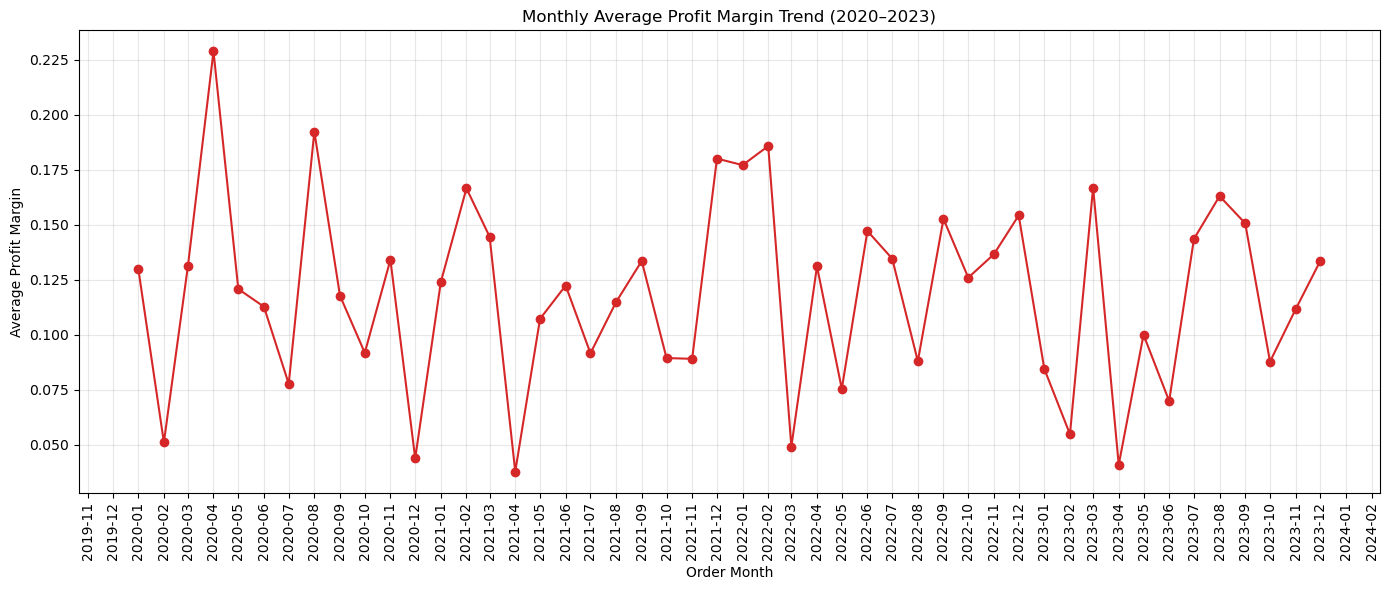

In [148]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Month'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

monthly_margin = (
    df.groupby('Order Month')['Profit Margin']
    .mean()
    .reset_index()
)

plt.figure(figsize=(14, 6))
plt.plot(monthly_margin['Order Month'], monthly_margin['Profit Margin'], marker='o', color='tab:red')
plt.title('Monthly Average Profit Margin Trend (2020–2023)')
plt.xlabel('Order Month')
plt.ylabel('Average Profit Margin')
plt.grid(True, alpha=0.3)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

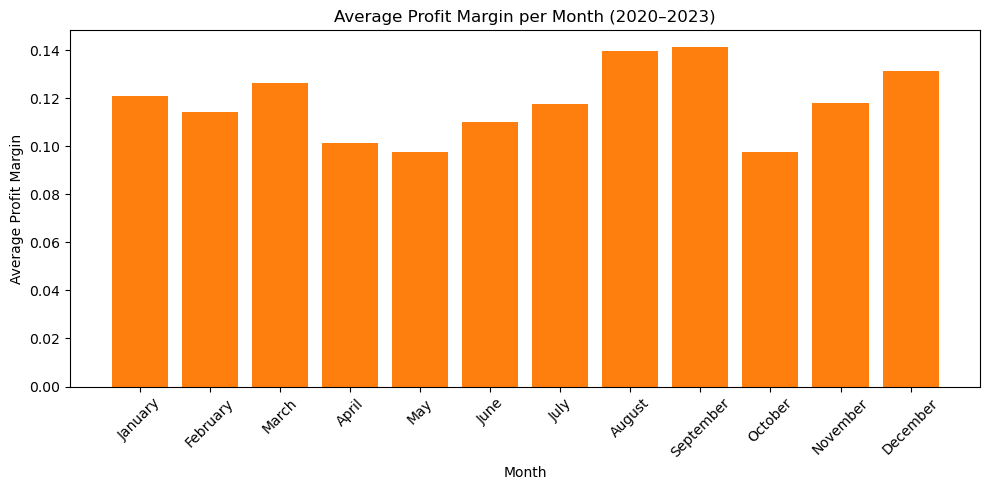

In [149]:
df['Order MonthName'] = df['Order Date'].dt.month_name()
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_name_margin = (
    df.groupby('Order MonthName')['Profit Margin']
    .mean()
    .reindex(month_order)
    .reset_index()
)

plt.figure(figsize=(10, 5))
plt.bar(monthly_name_margin['Order MonthName'], monthly_name_margin['Profit Margin'], color='tab:orange')
plt.title('Average Profit Margin per Month (2020–2023)')
plt.xlabel('Month')
plt.ylabel('Average Profit Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analisis Pola Profit Margin: Berdasarkan Kuartal dan Bulan (2020–2023)

### 1. **Tren Profit Margin Bulanan**
Dari grafik line chart bulanan, profit margin rata-rata per bulan terlihat masih sangat fluktuatif selama periode 2020–2023, tanpa pola musiman yang benar-benar konsisten setiap tahunnya. Naik-turunnya margin setiap bulan cukup tajam, sehingga agak sulit mengidentifikasi puncak atau lembah musiman secara kasat mata dari grafik ini.

### 2. **Rata-rata Profit Margin per Nama Bulan**
Pada grafik bar, kita bisa mengamati rata-rata profit margin untuk setiap bulan (agregasi seluruh tahun 2020–2023):
- **Profit margin cenderung lebih tinggi pada bulan Agustus dan September** (sekitar 14%), dan juga sedikit meningkat di Desember dan Maret.
- **Profit margin cenderung lebih rendah di bulan Mei, Oktober, dan April** (kisaran 9%–10%).
- Bulan-bulan lainnya relatif stabil di kisaran 11%–13%.

### 3. **Kesimpulan & Insight**
- **Ada indikasi adanya tren musiman terbatas**, di mana profit margin cenderung sedikit naik di akhir kuartal 3 (Agustus–September) dan Desember.
- Namun, perbedaannya tidak terlalu mencolok dan fluktuasi bulanan tetap terjadi hampir setiap tahun.
- Margin terendah pada Mei dan Oktober bisa menjadi sinyal untuk dievaluasi—apakah ada promosi besar, peningkatan diskon, atau peningkatan biaya di bulan-bulan tersebut.

### 4. **Rekomendasi Bisnis**
- **Optimalkan strategi pricing dan diskon pada bulan-bulan dengan margin rendah** untuk meningkatkan profitabilitas.
- Perlu analisis lanjutan: breakdown lebih detail per region, segmen pelanggan, atau produk untuk memahami akar penyebab naik-turunnya margin di bulan tertentu.
- Pantau secara khusus bulan Agustus–September dan Desember untuk melihat peluang penguatan strategi promosi atau efisiensi biaya karena margin cenderung lebih tinggi.

---


### Analisis Kontribusi Regional

**Tujuan Analisis:**  
Analisis kontribusi regional bertujuan untuk mengidentifikasi **region** dan **subregion** mana yang memberikan kontribusi terbesar terhadap total penjualan (**Sales**) dan keuntungan (**Profit**) perusahaan. Insight ini sangat penting untuk:
- Menentukan wilayah prioritas pengembangan pasar dan alokasi sumber daya.
- Mengidentifikasi peluang ekspansi atau perbaikan strategi di region/subregion dengan performa rendah.
- Mendukung pengambilan keputusan pemasaran dan penjualan secara lebih terarah.

**Kolom yang Digunakan:**
- `Region` — untuk membandingkan performa antar wilayah utama (AMER, EMEA, APJ).
- `Subregion` — untuk melihat detail performa di dalam setiap region.
- `Sales` — nilai total penjualan per transaksi.
- `Profit` — nilai keuntungan kotor per transaksi.

Hasil analisis ini akan divisualisasikan dalam bentuk **bar chart** dan **tabel ranking**, sehingga perbandingan kontribusi tiap wilayah dapat dilihat secara jelas dan kuantitatif.


Tabel ringkasan per Region:
  Region         Sales       Profit  Profit Margin
0   EMEA  1.043887e+06  147456.0450       0.169981
1   AMER  8.378496e+05  127426.9898       0.218749
2    APJ  4.154642e+05   11513.9869      -0.149975


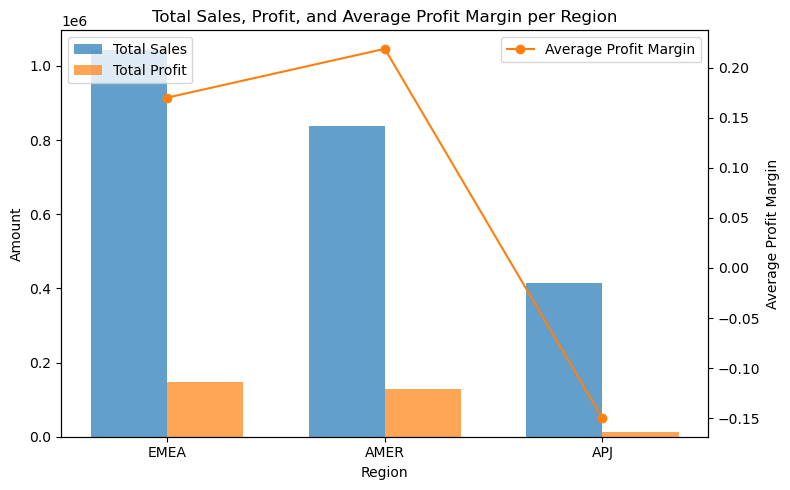


Tabel ringkasan per Subregion:
   Region Subregion        Sales       Profit  Profit Margin
0    AMER     NAMER  596328.9015  109784.0388       0.277934
1    EMEA   EU-WEST  384065.6140   26706.6029       0.071539
2    EMEA      UKIR  347468.0210   85238.2452       0.302176
3    AMER     LATAM  241520.7030   17642.9510       0.090615
4     APJ      JAPN  170188.0458  -25729.3563      -0.342011
5    EMEA       NOR  127326.9600   16044.7604       0.169609
6     APJ      APAC  106771.2120   30311.1778       0.336265
7     APJ       ANZ   84949.6230  -11450.7709      -0.343492
8    EMEA       MEA   76793.6960    7200.1468       0.176588
9    EMEA   EU-EAST   76118.1140    3864.4893       0.090362
10    APJ       IND   53555.3600   18382.9363       0.347852
11   EMEA        EU   32114.6100    8401.8004       0.317909


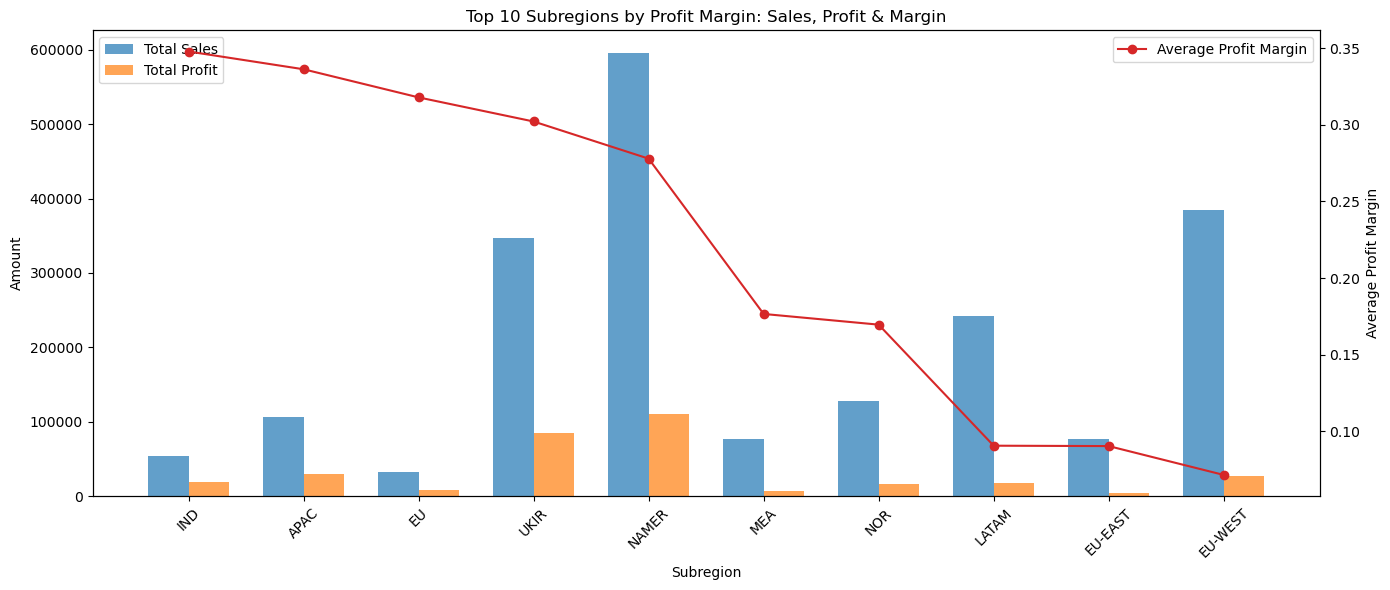

In [150]:
region_summary = (
    df.groupby('Region')
    .agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Profit Margin': 'mean'
    })
    .sort_values(by='Sales', ascending=False)
    .reset_index()
)

print("Tabel ringkasan per Region:")
print(region_summary)

fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = np.arange(len(region_summary['Region']))

bars1 = ax1.bar(x - bar_width/2, region_summary['Sales'], width=bar_width, label='Total Sales', alpha=0.7)
bars2 = ax1.bar(x + bar_width/2, region_summary['Profit'], width=bar_width, label='Total Profit', alpha=0.7)
ax1.set_ylabel('Amount')
ax1.set_xlabel('Region')
ax1.set_xticks(x)
ax1.set_xticklabels(region_summary['Region'])
ax1.legend(loc='upper left')
ax1.set_title('Total Sales, Profit, and Average Profit Margin per Region')

ax2 = ax1.twinx()
ax2.plot(x, region_summary['Profit Margin'], color='tab:orange', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

subregion_summary = (
    df.groupby(['Region', 'Subregion'])
    .agg({
        'Sales': 'sum',
        'Profit': 'sum',
        'Profit Margin': 'mean'
    })
    .sort_values(by='Sales', ascending=False)
    .reset_index()
)

print("\nTabel ringkasan per Subregion:")
print(subregion_summary)

top_sub = subregion_summary.sort_values('Profit Margin', ascending=False).head(10)

x = np.arange(len(top_sub['Subregion']))
bar_width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 6))

bars1 = ax1.bar(x - bar_width/2, top_sub['Sales'], width=bar_width, label='Total Sales', alpha=0.7)
bars2 = ax1.bar(x + bar_width/2, top_sub['Profit'], width=bar_width, label='Total Profit', alpha=0.7)
ax1.set_ylabel('Amount')
ax1.set_xlabel('Subregion')
ax1.set_xticks(x)
ax1.set_xticklabels(top_sub['Subregion'], rotation=45)
ax1.legend(loc='upper left')
ax1.set_title('Top 10 Subregions by Profit Margin: Sales, Profit & Margin')

ax2 = ax1.twinx()
ax2.plot(x, top_sub['Profit Margin'], color='tab:red', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Analisis Kontribusi Regional dan Subregional terhadap Kinerja Penjualan & Profitabilitas

### 1. **Analisis Regional**
Berdasarkan tabel dan grafik, terdapat perbedaan kinerja yang cukup mencolok antar region:

| Region | Total Sales   | Total Profit   | Avg. Profit Margin |
|--------|--------------|---------------|--------------------|
| EMEA   | 1,043,887    | 147,456       | 17.0%              |
| AMER   | 837,850      | 127,427       | 21.9%              |
| APJ    | 415,464      | 11,514        | -15.0%             |

- **EMEA** menjadi region dengan kontribusi *sales* dan *profit* terbesar. Namun, profit margin-nya (17%) lebih rendah dari AMER.
- **AMER** meski total sales-nya di bawah EMEA, memiliki rata-rata profit margin tertinggi (22%), menunjukkan efisiensi operasional dan pricing yang lebih baik.
- **APJ** menjadi perhatian khusus karena profit margin-nya **negatif** (-15%), artinya rata-rata penjualan di region ini justru mengalami kerugian meski sales cukup besar. Ini menjadi sinyal adanya problem pricing, diskon, atau struktur biaya di region APJ.

---

### 2. **Analisis Subregional**
Melihat lebih dalam ke subregion (top 12 sales):

| Subregion | Region | Sales      | Profit      | Profit Margin |
|-----------|--------|------------|-------------|--------------|
| NAMER     | AMER   | 596,329    | 109,784     | 27.8%        |
| EU-WEST   | EMEA   | 384,066    | 26,707      | 7.2%         |
| UKIR      | EMEA   | 347,468    | 85,238      | 30.2%        |
| LATAM     | AMER   | 241,521    | 17,643      | 9.1%         |
| JAPN      | APJ    | 170,188    | -25,729     | -34.2%       |
| NOR       | EMEA   | 127,327    | 16,045      | 17.0%        |
| APAC      | APJ    | 106,771    | 30,311      | 33.6%        |
| ANZ       | APJ    | 84,950     | -11,451     | -34.3%       |
| MEA       | EMEA   | 76,794     | 7,200       | 17.7%        |
| EU-EAST   | EMEA   | 76,118     | 3,864       | 9.0%         |
| IND       | APJ    | 53,555     | 18,383      | 34.8%        |
| EU        | EMEA   | 32,115     | 8,402       | 31.8%        |

- **Subregion dengan sales tertinggi:** NAMER (Amerika Utara) dan UKIR (UK & Irlandia) juga memiliki profit margin tinggi (27.8% dan 30.2%).
- **Subregion margin tertinggi:** IND (India), APAC, dan UKIR dengan margin di atas 30%, walaupun sales mereka lebih kecil.
- **Subregion margin negatif:** JAPN dan ANZ di APJ, profit margin sangat negatif (lebih dari -34%), menjadi kontributor utama buruknya margin APJ.
- **EU-WEST** memiliki sales besar namun margin rendah (7.2%), patut dicermati efisiensi biayanya.

---

### 3. **Insight dan Rekomendasi**
- **Perkuat kehadiran di AMER dan subregion NAMER & UKIR** yang membuktikan kontribusi sales, profit, dan margin tinggi.
- **APJ perlu perhatian khusus**:  
  - JAPN dan ANZ perlu dievaluasi secara menyeluruh (struktur harga, diskon, biaya) karena menjadi sumber kerugian signifikan.
  - Sementara subregion IND dan APAC cukup sehat, bisa menjadi pilot untuk strategi turnaround APJ.
- **EMEA tetap kuat dalam sales**, tapi sebaiknya evaluasi efisiensi di subregion seperti EU-WEST dan EU-EAST yang memiliki margin rendah.
- **Potensi Upscaling** pada subregion dengan margin tinggi namun sales masih kecil (misal IND, APAC, EU), sehingga peluang pertumbuhan profit lebih besar jika fokus ekspansi diarahkan ke sana.
---

**Kesimpulan:**  
Peta kontribusi ini menunjukkan pentingnya strategi berbasis data di tiap region dan subregion. Prioritaskan pasar yang sehat, dan segera perbaiki area dengan margin rendah atau negatif agar pertumbuhan perusahaan lebih berkualitas dan profitabilitas terjaga.


#### Analisis Perbandingan Segmen Pelanggan

**Tujuan:**  
Membandingkan performa penjualan dan profitabilitas antar segmen pelanggan (SMB, Strategic, Enterprise) dengan mengukur dua metrik utama:
- **Average Order Value (AOV)** — rata-rata nilai transaksi per pesanan.
- **Profit Margin** — rata-rata efisiensi keuntungan dari setiap penjualan.

Analisis ini membantu:
- Menentukan segmen mana yang paling menguntungkan atau memiliki nilai transaksi terbesar.
- Memberikan insight untuk pengambilan keputusan fokus pemasaran, program loyalty, dan strategi upsell/cross-sell.

**Kolom yang digunakan:**
- `Segment` — kategori pelanggan (SMB, Strategic, Enterprise)
- `Order ID` — untuk menghitung jumlah pesanan (AOV)
- `Sales` — nilai penjualan
- `Profit` — keuntungan kotor
- `Profit Margin` — efisiensi profit per transaksi



Tabel ringkasan per Segment:
      Segment         Sales  Order Count       Profit  Profit Margin         AOV
0  Enterprise  4.296531e+05          909   60298.6785       0.142870  472.665730
1         SMB  1.161401e+06         2586  134119.2092       0.112050  449.111116
2   Strategic  7.061464e+05         1514   91979.1340       0.121203  466.411075


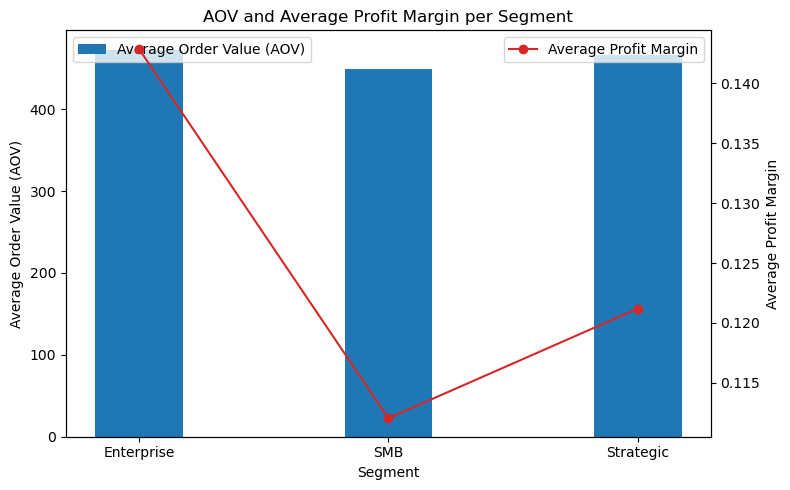

In [151]:
segment_order = (
    df.groupby('Segment')
    .agg({
        'Sales': 'sum',
        'Order ID': pd.Series.nunique,
        'Profit': 'sum',
        'Profit Margin': 'mean'
    })
    .rename(columns={'Order ID': 'Order Count'})
    .reset_index()
)
segment_order['AOV'] = segment_order['Sales'] / segment_order['Order Count']

print("Tabel ringkasan per Segment:")
print(segment_order)

fig, ax1 = plt.subplots(figsize=(8, 5))

bar_width = 0.35
x = range(len(segment_order['Segment']))

bars1 = ax1.bar(x, segment_order['AOV'], width=bar_width, color='tab:blue', label='Average Order Value (AOV)')
ax1.set_ylabel('Average Order Value (AOV)')
ax1.set_xlabel('Segment')
ax1.set_xticks(x)
ax1.set_xticklabels(segment_order['Segment'])
ax1.set_title('AOV and Average Profit Margin per Segment')

ax2 = ax1.twinx()
ax2.plot(x, segment_order['Profit Margin'], color='tab:red', marker='o', label='Average Profit Margin')
ax2.set_ylabel('Average Profit Margin')
ax2.legend(loc='upper right')

ax1.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [152]:
from scipy.stats import f_oneway
margin_smb = df[df['Segment'] == 'SMB']['Profit Margin'].dropna()
margin_strategic = df[df['Segment'] == 'Strategic']['Profit Margin'].dropna()
margin_enterprise = df[df['Segment'] == 'Enterprise']['Profit Margin'].dropna()

anova_result = f_oneway(margin_smb, margin_strategic, margin_enterprise)
print("Hasil uji ANOVA:")
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.4f}")

if anova_result.pvalue < 0.05:
    print("Terdapat perbedaan signifikan rata-rata profit margin antar segmen (p < 0.05)")
else:
    print("Tidak ada perbedaan signifikan rata-rata profit margin antar segmen (p >= 0.05)")

Hasil uji ANOVA:
F-statistic: 2.902
P-value: 0.0550
Tidak ada perbedaan signifikan rata-rata profit margin antar segmen (p >= 0.05)


## Insight & Analisis Perbandingan Segmen Pelanggan

Berdasarkan tabel dan grafik:

| Segment     | AOV (Rata‑rata Order Value) | Avg. Profit Margin |
|-------------|-----------------------------|--------------------|
| **Enterprise** | 472.67                      | 14.29%             |
| **Strategic**  | 466.41                      | 12.12%             |
| **SMB**        | 449.11                      | 11.21%             |

1. **Average Order Value**  
   - **Enterprise** mencatat nilai transaksi rata‑rata tertinggi (≈ \$473), diikuti **Strategic** (≈ \$466) dan **SMB** (≈ \$449).  
   - Perbedaan AOV antar segmen cukup nyata secara bisnis, menunjukkan pelanggan Enterprise cenderung melakukan pembelian dengan nilai lebih besar per pesanan.

2. **Profit Margin**  
   - **Enterprise** juga memiliki profit margin rata‑rata tertinggi (≈ 14.3%), di atas Strategic (≈ 12.1%) dan SMB (≈ 11.2%).  
   - Ini mengindikasikan bahwa selain membayar lebih tinggi, pelanggan Enterprise juga memberikan keuntungan relatif lebih baik bagi perusahaan.

3. **Hasil Uji ANOVA**  
   - F‑statistic ≈ 2.902, p‑value = 0.0550 (> 0.05) → **tidak ada bukti** kuat secara statistik (α=5%) bahwa rata‑rata profit margin ketiga segmen berbeda signifikan.  
   - Namun, p‑value yang mendekati 0.05 (borderline) bisa diinterpretasikan sebagai indikasi potensi perbedaan—mungkin signifikan pada tingkat signifikansi 10%.

4. **Rekomendasi Bisnis**  
   - **Fokus pada segmen Enterprise** untuk program upsell, retensi, dan paket harga premium, karena AOV dan margin tertinggi.  
   - **Strategic** relatif kuat di kedua metrik; pertahankan strategi saat ini sambil eksplorasi penawaran tambahan.  
   - **SMB**: pertimbangkan insentif (bundle, diskon terarah) untuk meningkatkan AOV dan margin—misalnya paket multi‑user atau add‑on, karena saat ini yang terendah di antara ketiganya.  
   - Jika diperlukan, jalankan **post‑hoc test** (Tukey HSD) atau perpanjang periode data untuk memastikan perbedaan margin secara statistik.

Dengan insight ini, tim dapat merancang strategi harga dan promosi yang lebih tersegmentasi, memaksimalkan keuntungan dari pelanggan Enterprise sambil meningkatkan profitabilitas segmen yang lebih kecil.  


## 4. Kinerja Produk dengan Profit Margin

**Tujuan Analisis:**  
- Mengidentifikasi produk SaaS mana yang **terlaris** (total Sales tertinggi), **paling menguntungkan** (total Profit tertinggi), dan **paling efisien** (Profit Margin tertinggi).  
- Memvisualisasikan **perbandingan** antara Sales, Profit, dan Profit Margin untuk Top‑10 produk, serta melihat **distribusi** Profit Margin per order.

**Kolom yang Digunakan:**  
- `Product`  
- `Sales`  
- `Profit`  
- `Profit Margin` (harus ditambahkan jika belum ada: `df['Profit Margin'] = df['Profit']/df['Sales']`)

Ternyata, memang ada perbedaan CDI yang signifikan antara kondidat yang ingin pindah kerja dan tidak, dengan kandidat yang ingin pindah kerja berasal dari kota dengan CDI yang lebih rendah.

Untuk lebih jelas, kita bisa melihat grafik di bawah. Kandidat yang ingin pindah kerja berasal dari kota dengan median CDI 0.75, sedangkan kandidat yang tidak ingin pindah kerja berasal dari kota dengan CDI 0.9

Tapi, jika kita telaah lebih lanjut, kita akan mendapati bahwa city_103 memiliki kontribusi cukup besar dalam penentuan median target kelas 0, sedangkan city_21 berkontribusi pada median kelas 1. Hal ini bisa terjadi karena, 
1. memang kedua kota ini memiliki jumlah penduduk yang cukup padat dibanding kota-kota lain, sehingga mendominasi sebagai kota asal kandidat, atau 
1. perusahaan lebih aktif melakukan perekrutan hanya di kedua kota ini saja.

Apabila opsi 2 yang terjadi, maka akan lebih baik apabila ke depannya perekrutan kandidat dilakukan secara lebih merata, sehingga kita bisa yakin bahwa hasil analisis kita terhindar dari bias.

Top-10 Products by Sales & Profit:
                   Product        Sales      Profit  Profit Margin
3           ContactMatcher  410378.2650  12496.2822       0.030451
5               FinanceHub  340935.4150  32136.4203       0.094260
11          Site Analytics  330007.0540  44515.7306       0.134893
7   Marketing Suite - Gold  223843.6080  21278.8264       0.095061
1          Big Ol Database  189238.6310   3384.7569       0.017886
4             Data Smasher  167380.3180  41936.6357       0.250547
0                  Alchemy  149528.0300  55617.8249       0.371956
13                 Support  125152.7440  32864.4698       0.262595
6          Marketing Suite  114879.9963  -3472.5560      -0.030228
8                  OneView  107532.1610  18138.0054       0.168675


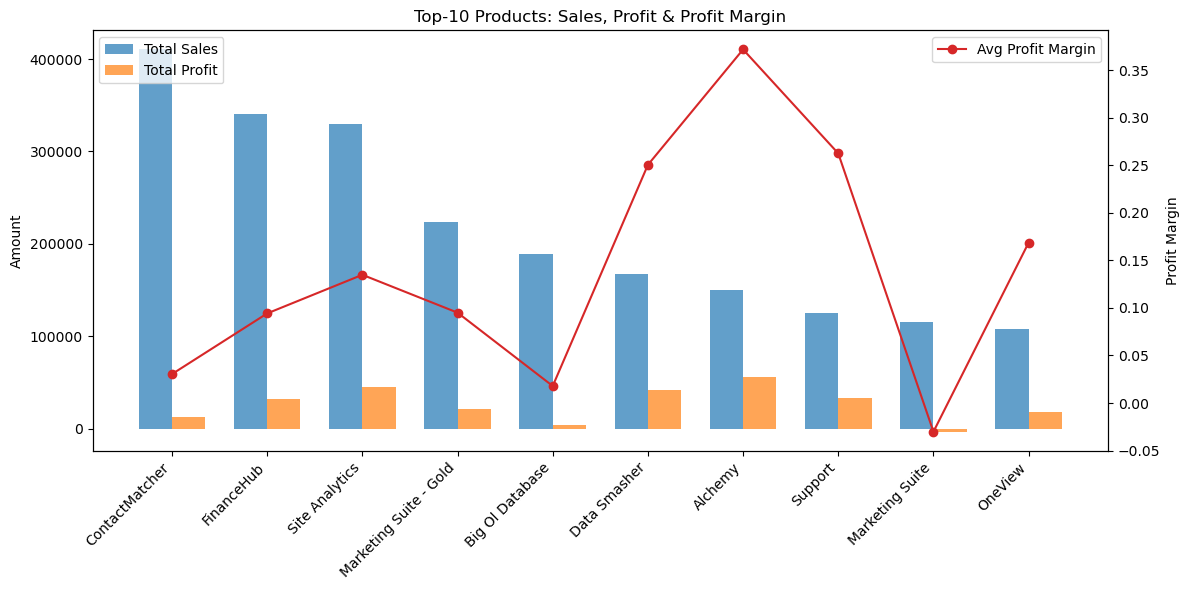

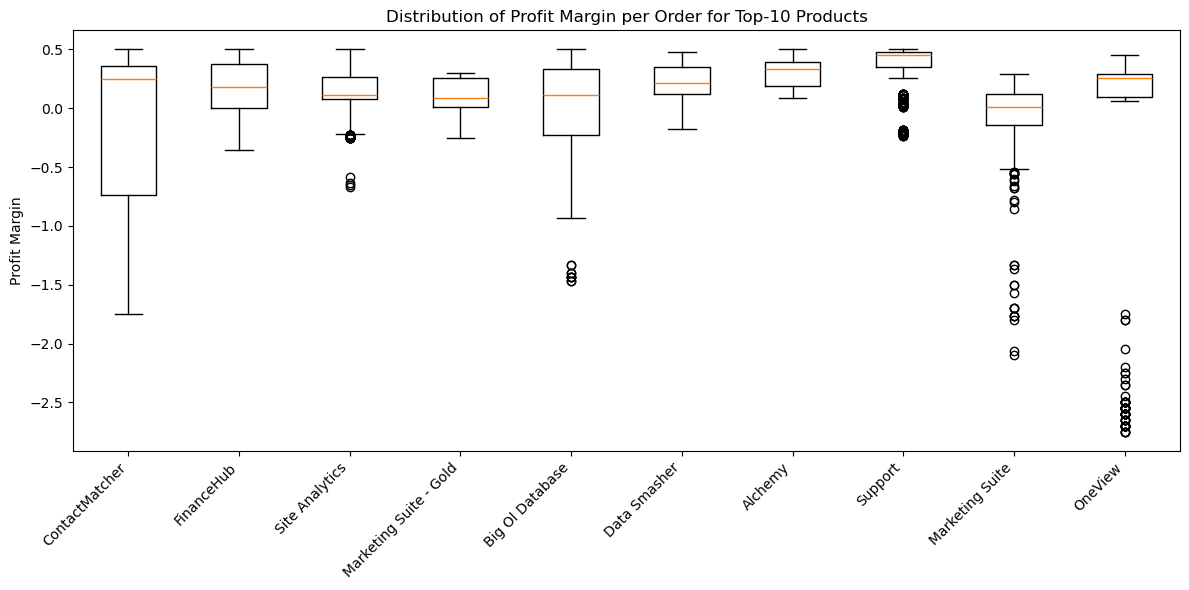

In [153]:
prod_summary = (
    df
    .groupby('Product')
    .agg({
        'Sales': 'sum',
        'Profit': 'sum'
    })
    .assign(**{
        'Profit Margin': lambda x: x['Profit'] / x['Sales']
    })
    .reset_index()
)

top10 = prod_summary.sort_values('Sales', ascending=False).head(10)

print("Top-10 Products by Sales & Profit:")
print(top10[['Product','Sales','Profit','Profit Margin']])

x = range(len(top10))
bar_w = 0.35

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.bar([i-bar_w/2 for i in x], top10['Sales'], width=bar_w, label='Total Sales', alpha=0.7)
ax1.bar([i+bar_w/2 for i in x], top10['Profit'], width=bar_w, label='Total Profit', alpha=0.7)
ax1.set_xticks(x)
ax1.set_xticklabels(top10['Product'], rotation=45, ha='right')
ax1.set_ylabel('Amount')
ax1.set_title('Top-10 Products: Sales, Profit & Profit Margin')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, top10['Profit Margin'], color='tab:red', marker='o', label='Avg Profit Margin')
ax2.set_ylabel('Profit Margin')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
data = [ df[df['Product']==p]['Profit Margin'] for p in top10['Product'] ]
plt.boxplot(data, labels=top10['Product'], showfliers=True)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit Margin')
plt.title('Distribution of Profit Margin per Order for Top-10 Products')
plt.tight_layout()
plt.show()

## Insight & Analisis Kinerja Produk

Berdasarkan **Top‑10 Products by Sales & Profit Margin**, terlihat perbedaan yang menarik antara volume penjualan, profit absolut, dan efisiensi margin tiap produk:

1. **Volume Penjualan Tinggi, Margin Rendah**  
   - **ContactMatcher** memimpin penjualan dengan **≈ \$410K**, namun memiliki margin sangat tipis (~ 3 %). Artinya, produk ini digunakan luas tetapi dengan profitabilitas rendah—bisa jadi karena diskon agresif atau biaya layanan yang tinggi.  
   - **Big Ol Database** juga menunjukkan pola serupa: sales tinggi (~ \$189K) dengan margin hanya ~ 1.8 %.

2. **Penjualan & Margin Moderat**  
   - **FinanceHub** (≈ \$341K sales, ~ 9.4 % margin) dan **Site Analytics** (≈ \$330K sales, ~ 13.5 % margin) mengombinasikan volume yang baik dengan efisiensi margin menengah. Keduanya berpotensi dijadikan andalan “workhorses” bisnis—cukup stabil dari sisi profitabilitas.

3. **Produk Premium Bermargin Tinggi**  
   - **Alchemy** tampil luar biasa di segi margin (~ 37 %) meski sales-nya lebih kecil (~ \$150K).  
   - **Data Smasher** (≈ 25 % margin) dan **Support** (≈ 26 % margin) juga menunjukkan profitabilitas tinggi pada volume menengah (~ \$125–167K sales).  
   - Produk‑produk ini ideal untuk dipromosikan lebih agresif atau dijadikan paket premium guna menaikkan profit total.

4. **Produk Peringatan (Loss Leader)**  
   - **Marketing Suite** (versi standar) memiliki margin rata‑rata **negatif** (~ −3 %), bahkan boxplot menunjukkan banyak transaksi rugi mendalam (outlier di bawah −2 %). Ini mengindikasikan biaya implementasi atau diskon jauh melebihi revenue—perlu evaluasi ulang model pricing, biaya dukungan, atau syarat kontraknya.

5. **Distribusi Margin per Order**  
   - **ContactMatcher** dan **Marketing Suite** memperlihatkan **outlier margin negatif** ekstrem, menandakan beberapa order mengalami kerugian besar.  
   - **Alchemy**, **Support**, dan **Data Smasher** relatif stabil dengan distribusi margin tinggi dan sedikit outlier negatif—menunjukkan konsistensi profitabilitas.

---

### Rekomendasi Strategis

- **Optimalkan Pricing & Discount** pada **ContactMatcher** dan **Big Ol Database** agar margin meningkat tanpa mengorbankan volume besar yang sudah ada.  
- **Skalakan Penjualan** produk **Alchemy**, **Data Smasher**, dan **Support** yang efisien margin tinggi, misalnya lewat bundling atau upgrade paket.  
- **Audit & Revisi** model bisnis **Marketing Suite** (versi standar) untuk menghentikan transaksi rugi: perbaiki struktur biaya, naikkan harga, atau kurangi diskon.  
- Monitor terus distribusi margin per order untuk mendeteksi order-order bermasalah (outlier negatif) dan atasi akar penyebabnya (mis. terms diskon, biaya tambahan, kesalahan pemesanan).

Dengan pendekatan ini, perusahaan tidak hanya memaksimalkan volume penjualan, tetapi juga meningkatkan profitabilitas keseluruhan di portofolio produk SaaS.  


### 5. Dampak Diskon terhadap Sales, Profit, dan Profit Margin per Industry & Region

**Tujuan Analisis:**  
Mengetahui bagaimana **diskon** memengaruhi tidak hanya profit margin, tetapi juga **penjualan (Sales)** dan **keuntungan (Profit)** pada setiap kombinasi **Industry** dan **Region**. Hasilnya akan membantu merumuskan kebijakan diskon yang terarah, menjaga volume penjualan sekaligus profitabilitas.

**Kolom yang Digunakan:**  
- `Discount` – persentase diskon (0.2 = 20%)  
- `Sales` – nilai penjualan per transaksi  
- `Profit` – keuntungan per transaksi  
- `Profit Margin` – efisiensi keuntungan (`Profit / Sales`)  
- `Industry` – sektor industri pelanggan  
- `Region` – wilayah geografis (AMER, EMEA, APJ)


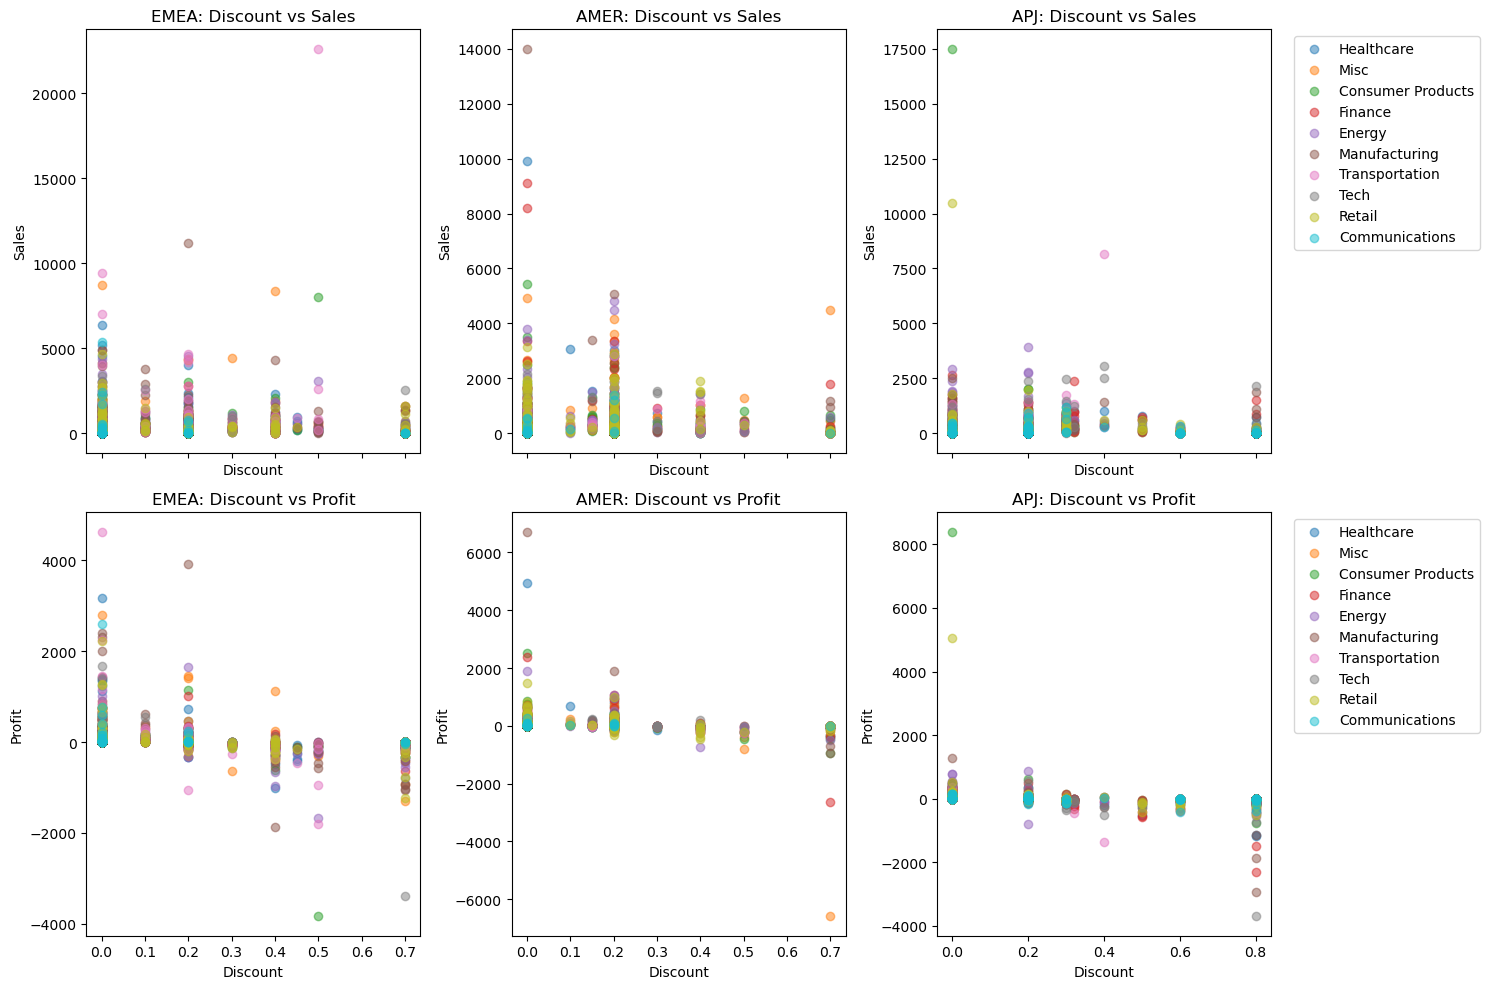

Discount vs Sales: r=-0.028, p=0.0048
Discount vs Profit: r=-0.219, p=0.0000
Discount vs Profit Margin: r=-0.864, p=0.0000


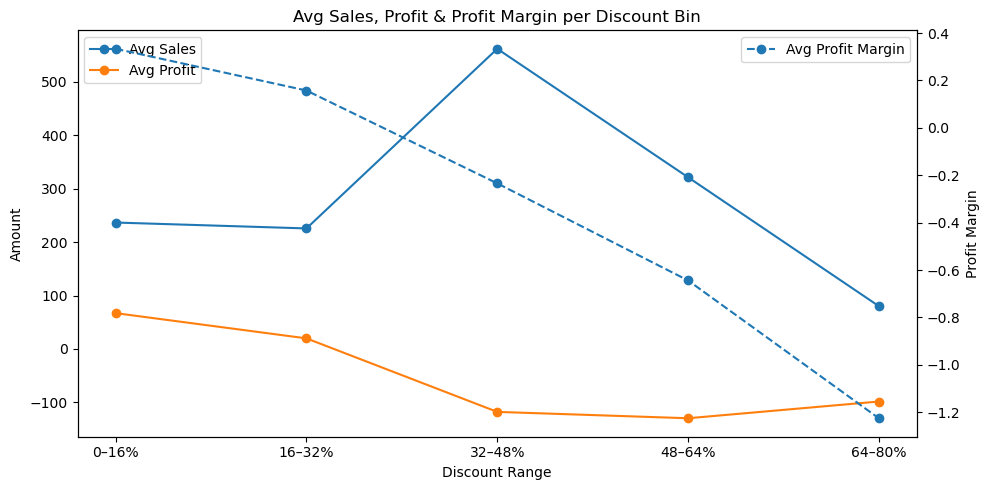

In [154]:
regions = df['Region'].unique()
fig, axes = plt.subplots(2, len(regions), figsize=(5*len(regions), 10), sharex='col')

for i, region in enumerate(regions):
    sub = df[df['Region'] == region]
    ax1 = axes[0, i]
    for industry in sub['Industry'].unique():
        tmp = sub[sub['Industry'] == industry]
        ax1.scatter(tmp['Discount'], tmp['Sales'], label=industry, alpha=0.5)
    ax1.set_title(f'{region}: Discount vs Sales')
    ax1.set_xlabel('Discount')
    ax1.set_ylabel('Sales')
    if i == len(regions)-1:
        ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2 = axes[1, i]
    for industry in sub['Industry'].unique():
        tmp = sub[sub['Industry'] == industry]
        ax2.scatter(tmp['Discount'], tmp['Profit'], label=industry, alpha=0.5)
    ax2.set_title(f'{region}: Discount vs Profit')
    ax2.set_xlabel('Discount')
    ax2.set_ylabel('Profit')
    if i == len(regions)-1:
        ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

r_sales, p_sales = pearsonr(df['Discount'], df['Sales'])
r_profit, p_profit = pearsonr(df['Discount'], df['Profit'])
r_margin, p_margin = pearsonr(df['Discount'], df['Profit Margin'])
print(f'Discount vs Sales: r={r_sales:.3f}, p={p_sales:.4f}')
print(f'Discount vs Profit: r={r_profit:.3f}, p={p_profit:.4f}')
print(f'Discount vs Profit Margin: r={r_margin:.3f}, p={p_margin:.4f}')

bins = np.linspace(df['Discount'].min(), df['Discount'].max(), 6)
labels = [f"{int(l*100)}–{int(r*100)}%" for l,r in zip(bins[:-1], bins[1:])]
df['Discount Bin'] = pd.cut(df['Discount'], bins=bins, labels=labels, include_lowest=True)

bin_summary = df.groupby('Discount Bin').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Profit Margin': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(bin_summary['Discount Bin'], bin_summary['Sales'], marker='o', label='Avg Sales')
ax1.plot(bin_summary['Discount Bin'], bin_summary['Profit'], marker='o', label='Avg Profit')
ax1.set_xlabel('Discount Range')
ax1.set_ylabel('Amount')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(bin_summary['Discount Bin'], bin_summary['Profit Margin'], marker='o', linestyle='--', label='Avg Profit Margin')
ax2.set_ylabel('Profit Margin')
ax2.legend(loc='upper right')

plt.title('Avg Sales, Profit & Profit Margin per Discount Bin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Insight Dampak Diskon terhadap Sales, Profit, dan Profit Margin per Industry & Region

1. **Hubungan Umum (Pearson r)**  
   - **Diskon vs Sales**: r = –0.028 (p = 0.0048) → korelasi hampir nol, sedikit negatif. Artinya, secara keseluruhan diskon **tidak** secara konsisten mendorong kenaikan volume penjualan.  
   - **Diskon vs Profit**: r = –0.219 (p < 0.001) → korelasi negatif sedang. Diskon lebih besar umumnya berasosiasi dengan penurunan profit absolut.  
   - **Diskon vs Profit Margin**: r = –0.864 (p < 0.001) → korelasi negatif sangat kuat. Semakin besar diskon, margin keuntungan langsung tertekan drastis.

2. **Perbedaan Per Region**  
   - **EMEA & AMER** menunjukkan **peningkatan sporadis** pada penjualan di rentang diskon rendah–menengah (sekitar 10–30%), namun profit dan margin sudah mulai melemah setelah discount >20%.  
   - **APJ** memiliki banyak titik diskon tinggi (≥40%) yang justru menghasilkan **profit negatif** dan margin sangat rendah, menandakan kebijakan diskon agresif di APJ seringkali **merugikan**.

3. **Variasi Per Industry**  
   - Sektor **Manufacturing**, **Tech**, dan **Consumer Products** menunjukkan toleransi diskon yang sedikit lebih tinggi—mereka masih mencatat profit positif pada diskon hingga ~30%.  
   - Industri seperti **Retail** dan **Transportation** cepat tertekan marginnya (margin turun ke negatif) bahkan pada diskon 20–30%.

4. **Analisis Binned Discount**  
   | Discount Range | Avg Sales | Avg Profit  | Avg Profit Margin |
   |---------------:|----------:|------------:|------------------:|
   | 0 – 16%        | ~ 240     | ~ 65        | + 0.35 (35 %)     |
   | 16 – 32%       | ~ 225     | ~ 20        | + 0.22 (22 %)     |
   | 32 – 48%       | ~ 560     | – 120       | – 0.02 (–2 %)     |
   | 48 – 64%       | ~ 320     | – 130       | – 0.48 (–48 %)    |
   | 64 – 80%       | ~ 80      | – 100       | – 1.25 (–125 %)   |

   - **Diskon rendah (≤ 16 %)**: sales dan profit margin tertinggi, profit absolut masih positif.  
   - **Diskon menengah (16 – 32 %)**: sales sedikit menurun, profit dan margin mulai tertekan—namun masih positif.  
   - **Diskon agresif (≥ 32 %)**: sales sempat melonjak (puncak di 32–48 %), tetapi profit sudah negatif dan margin amblas ke bawah nol. Diskon lebih dalam lagi (≥ 48 %) justru menurunkan sales kembali dan menambah kerugian.

5. **Rekomendasi Kebijakan Diskon**  
   - **Cap diskon di bawah ~20 %** untuk menjaga profitabilitas; pada rentang ini sales masih stabil dan margin masih sehat (>20 %).  
   - Gunakan **diskon menengah (20–30 %)** hanya untuk kampanye terbatas di segmen dan industry yang sudah terbukti toleran (misal, Manufacturing, Tech).  
   - Hindari diskon agresif (> 30 %) secara luas—meski bisa memicu lonjakan sales jangka pendek, kerugian yang dihasilkan akan meniadakan benefit tersebut.  
   - Terapkan **strategi diskon diferensial** per region–industry: lebih konservatif di APJ dan Retail, lebih fleksibel di AMER/EMEA serta sektor Tech/Manufacturing.

Dengan pendekatan ini, perusahaan dapat mempertahankan volume penjualan sambil melindungi margin dan profitabilitas, serta menyesuaikan kebijakan diskon sesuai karakteristik industry dan region.  


## Kesimpulan

Berdasarkan seluruh rangkaian analisis — mulai dari pola musiman, kontribusi regional & subregional, segmentasi pelanggan, kinerja produk, hingga dampak diskon — diperoleh poin‑poin utama berikut:

1. **Pola dan Tren Musiman**  
   - Tidak ada pola musim yang konsisten pada Sales maupun Profit Margin bulanan; fluktuasi terjadi secara sporadis sepanjang 2020–2023.  
   - Terdapat kecenderungan margin sedikit lebih tinggi pada Agustus–September dan Desember, serta terendah pada April, Mei, dan Oktober.

2. **Kontribusi Regional & Subregional**  
   - **EMEA** memimpin total Sales & Profit (≈ \$1.04 M & \$147K), margin rata‑rata 17 %.  
   - **AMER** memiliki margin tertinggi (≈ 22 %) dengan Sales ≈ \$838K dan Profit ≈ \$127K.  
   - **APJ** mencatat margin negatif (≈ – 15 %) meski Sales mencapai ≈ \$415K, menyiratkan masalah pricing atau biaya di wilayah ini.  
   - Subregion **NAMER** & **UKIR** unggul dari sisi margin (> 27 %) dan volume, sedangkan **JAPN** & **ANZ** (APJ) mencetak margin sangat negatif (> – 34 %).

3. **Perbandingan Segmen Pelanggan**  
   - **Enterprise**: AOV tertinggi (~ \$473) & margin ~ 14.3 %.  
   - **Strategic**: AOV ~ \$466 & margin ~ 12.1 %.  
   - **SMB**: AOV terendah (~ \$449) & margin ~ 11.2 %.  
   - Uji ANOVA menunjukkan perbedaan margin antar segmen tidak signifikan pada α=5 % (p = 0.055), meski secara bisnis Enterprise menonjol.

4. **Kinerja Produk**  
   - **ContactMatcher** & **Big Ol Database**: Sales tinggi (> \$189K) tetapi margin rendah (≤ 3 %).  
   - **Alchemy**, **Data Smasher**, **Support**: margin tinggi (25–37 %) dengan volume menengah (≈ \$125–150K).  
   - **Marketing Suite (standar)**: margin negatif (~ – 3 %) dengan outlier rugi besar.

5. **Dampak Kebijakan Diskon**  
   - Korelasi **Discount vs Profit Margin** sangat negatif (r = – 0.86), vs Profit juga negatif (r = – 0.22), vs Sales hampir nol (r = – 0.03).  
   - **Diskon ≤ 16 %**: sales & profit margin paling sehat.  
   - **Diskon 16–32 %**: margin mulai tertekan, namun profit masih positif.  
   - **Diskon > 32 %**: menimbulkan lonjakan sales jangka pendek (bin 32–48 %), tetapi profit & margin menjadi negatif.

---

## Rekomendasi

1. **Strategi Regional**  
   - **Perkuat EMEA & AMER**: alokasikan fokus penjualan dan pemasaran di wilayah berkontribusi tinggi.  
   - **Audit APJ** (terutama JAPN & ANZ): evaluasi ulang pricing, diskon, dan cost structure untuk menghentikan kerugian.

2. **Segmentasi Pelanggan**  
   - **Enterprise**: prioritas upsell, loyalty & paket premium.  
   - **Strategic**: pertahankan dan kembangkan penawaran tambahan.  
   - **SMB**: perkenalkan bundle/add‑on untuk meningkatkan AOV & margin.

3. **Portofolio Produk**  
   - **Optimasi ContactMatcher & Big Ol Database**: atur diskon lebih konservatif, tekankan value‑proposition.  
   - **Skala Alchemy, Data Smasher, Support**: manfaatkan margin tinggi lewat bundling atau promosi terarah.  
   - **Revisi Marketing Suite (standar)**: hentikan atau perbaiki loss‑leader, sesuaikan pricing/cost.

4. **Kebijakan Diskon Terukur**  
   - **Cap diskon di ≤ 20 %** untuk mayoritas transaksi.  
   - **Diskon 20–30 %** hanya untuk campaign terbatas di industry/region toleran (mis. Tech, Manufacturing di AMER/EMEA).  
   - **Hindari diskon > 30 %** secara luas — meski mendorong sales singkat, profitabilitas akan tergerus.

5. **Monitoring & Eksperimen**  
   - Bangun **dashboard real‑time** untuk memantau Sales, Profit, Margin, dan efek diskon per region/industry.  
   - Lakukan **A/B testing** pada skema diskon dan pricing di area kritis (APJ, Retail).  
   - Review berkala hasil implementasi dan sesuaikan strategi sesuai dinamika pasar.

Dengan kesimpulan dan rekomendasi ini, perusahaan siap mengambil langkah-langkah terukur untuk meningkatkan volume penjualan sekaligus memaksimalkan profitabilitas dan efisiensi kebijakan diskon di seluruh dimensi bisnis SaaS.  
